In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_insure = pd.read_csv('insurance.csv')

In [3]:
df_insure.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
## All data types are ok!!

In [6]:
df_insure.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df_insure['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
df_insure['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

# Exploratory Data Analysis

### Univariate Analysis

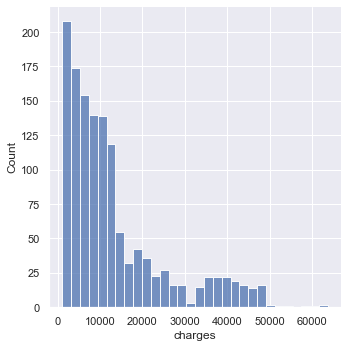

In [9]:
sns.displot(data=df_insure['charges'])
plt.show()

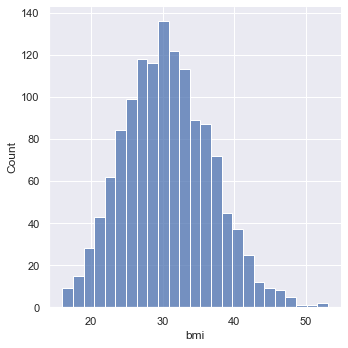

In [10]:
sns.displot(data=df_insure['bmi'])
plt.show()

### Bivariate Analysis

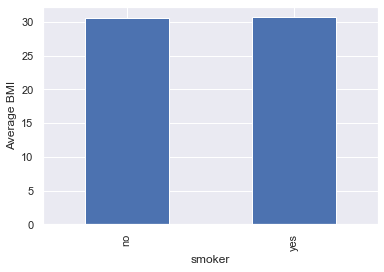

In [11]:
df_insure.groupby('smoker')['bmi'].mean().plot(kind='bar')
plt.ylabel('Average BMI')
plt.show()

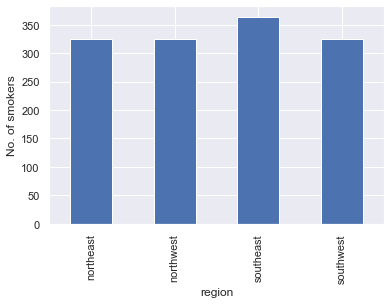

In [12]:
df_insure.groupby('region')['smoker'].count().plot(kind='bar')
plt.ylabel('No. of smokers')
plt.show()

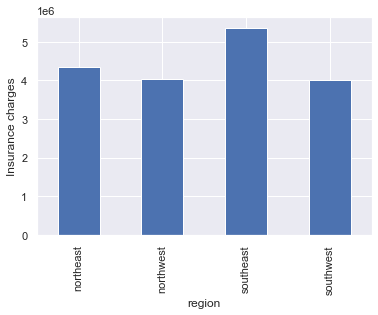

In [13]:
df_insure.groupby('region')['charges'].sum().plot(kind='bar')
plt.ylabel('Insurance charges')
plt.show()

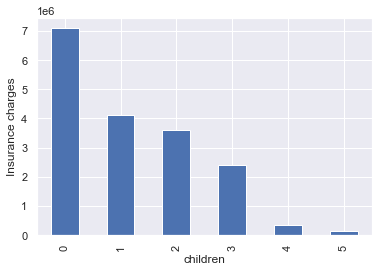

In [14]:
df_insure.groupby('children')['charges'].sum().plot(kind='bar')
plt.ylabel('Insurance charges')
plt.show()

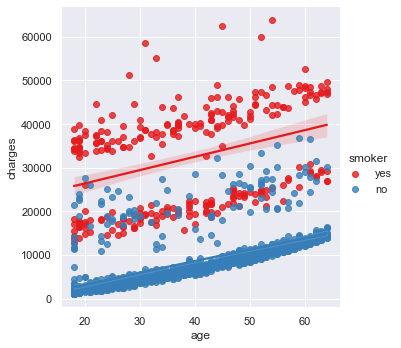

In [48]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df_insure, hue='smoker', palette='Set1')

# Encoding categorical variables

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_insure.iloc[:,0:6], df_insure.iloc[:, -1], test_size=0.25,random_state=1)

In [17]:
x_train.head()

,age,sex,bmi,children,smoker,region
1043,28,female,25.800,0,no,southwest
968,21,male,25.745,2,no,northeast
594,41,male,40.260,0,no,southeast
1079,63,male,33.660,3,no,southeast
1051,64,male,26.410,0,no,northeast


In [18]:
x_train.shape

(1003, 6)

In [19]:
x_test.head()

,age,sex,bmi,children,smoker,region
559,19,male,35.53,0,no,northwest
1087,57,male,31.54,0,no,northwest
1020,51,male,37.00,0,no,southwest
460,49,female,36.63,3,no,southeast
802,21,male,22.30,1,no,southwest


In [20]:
x_test.shape

(335, 6)

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
ohe=OneHotEncoder(drop='first')

In [23]:
x_train_array=ohe.fit_transform(x_train[['sex', 'smoker', 'region']]).toarray()
x_test_array=ohe.transform(x_test[['sex', 'smoker', 'region']]).toarray()

In [24]:
x_train_array

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.]])

In [25]:
ohe.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [26]:
x_test_array[0:5]

array([[1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.]])

In [27]:
x_trainfeatures=pd.DataFrame(x_train_array, columns=['male', 'smokes', 'northwest', 'southeast', 'southwest'])
x_trainfeatures

,male,smokes,northwest,southeast,southwest
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
998,1.0,0.0,0.0,0.0,1.0
999,0.0,0.0,0.0,0.0,0.0
1000,0.0,1.0,0.0,0.0,0.0
1001,0.0,1.0,0.0,1.0,0.0


In [28]:
x_testfeatures=pd.DataFrame(x_test_array, columns=['male', 'smokes', 'northwest', 'southeast', 'southwest'])
x_testfeatures

,male,smokes,northwest,southeast,southwest
0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
330,0.0,0.0,0.0,0.0,0.0
331,1.0,0.0,0.0,0.0,1.0
332,0.0,0.0,0.0,0.0,0.0
333,1.0,0.0,0.0,0.0,0.0


In [29]:
x_train_new=pd.concat([x_train, x_trainfeatures.set_axis(x_train.index)], axis=1)
x_train_new

,age,sex,bmi,children,smoker,region,male,smokes,northwest,southeast,southwest
1043,28,female,25.800,0,no,southwest,0.0,0.0,0.0,0.0,1.0
968,21,male,25.745,2,no,northeast,1.0,0.0,0.0,0.0,0.0
594,41,male,40.260,0,no,southeast,1.0,0.0,0.0,1.0,0.0
1079,63,male,33.660,3,no,southeast,1.0,0.0,0.0,1.0,0.0
1051,64,male,26.410,0,no,northeast,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
715,60,male,28.900,0,no,southwest,1.0,0.0,0.0,0.0,1.0
905,26,female,29.355,2,no,northeast,0.0,0.0,0.0,0.0,0.0
1096,51,female,34.960,2,yes,northeast,0.0,1.0,0.0,0.0,0.0
235,40,female,22.220,2,yes,southeast,0.0,1.0,0.0,1.0,0.0


In [30]:
x_train_new.drop(['sex', 'smoker', 'region'], axis=1, inplace= True)
x_train_new

,age,bmi,children,male,smokes,northwest,southeast,southwest
1043,28,25.800,0,0.0,0.0,0.0,0.0,1.0
968,21,25.745,2,1.0,0.0,0.0,0.0,0.0
594,41,40.260,0,1.0,0.0,0.0,1.0,0.0
1079,63,33.660,3,1.0,0.0,0.0,1.0,0.0
1051,64,26.410,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
715,60,28.900,0,1.0,0.0,0.0,0.0,1.0
905,26,29.355,2,0.0,0.0,0.0,0.0,0.0
1096,51,34.960,2,0.0,1.0,0.0,0.0,0.0
235,40,22.220,2,0.0,1.0,0.0,1.0,0.0


In [31]:
x_test_new=pd.concat([x_test, x_testfeatures.set_axis(x_test.index)], axis=1)
x_test_new

,age,sex,bmi,children,smoker,region,male,smokes,northwest,southeast,southwest
559,19,male,35.530,0,no,northwest,1.0,0.0,1.0,0.0,0.0
1087,57,male,31.540,0,no,northwest,1.0,0.0,1.0,0.0,0.0
1020,51,male,37.000,0,no,southwest,1.0,0.0,0.0,0.0,1.0
460,49,female,36.630,3,no,southeast,0.0,0.0,0.0,1.0,0.0
802,21,male,22.300,1,no,southwest,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1192,58,female,32.395,1,no,northeast,0.0,0.0,0.0,0.0,0.0
628,58,male,38.000,0,no,southwest,1.0,0.0,0.0,0.0,1.0
1098,52,female,30.875,0,no,northeast,0.0,0.0,0.0,0.0,0.0
1038,22,male,28.880,0,no,northeast,1.0,0.0,0.0,0.0,0.0


In [32]:
x_test_new.drop(['sex', 'smoker', 'region'], axis=1, inplace= True)
x_test_new

,age,bmi,children,male,smokes,northwest,southeast,southwest
559,19,35.530,0,1.0,0.0,1.0,0.0,0.0
1087,57,31.540,0,1.0,0.0,1.0,0.0,0.0
1020,51,37.000,0,1.0,0.0,0.0,0.0,1.0
460,49,36.630,3,0.0,0.0,0.0,1.0,0.0
802,21,22.300,1,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1192,58,32.395,1,0.0,0.0,0.0,0.0,0.0
628,58,38.000,0,1.0,0.0,0.0,0.0,1.0
1098,52,30.875,0,0.0,0.0,0.0,0.0,0.0
1038,22,28.880,0,1.0,0.0,0.0,0.0,0.0


In [33]:
y_train.head()

1043     3161.45400
968      3279.86855
594      5709.16440
1079    15161.53440
1051    14394.55790
Name: charges, dtype: float64

# Model Building and Prediction

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
LR_model=LinearRegression()
LR_model.fit(x_train_new, y_train)
y_pred=LR_model.predict(x_test_new)

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_test, y_pred)

0.7339256331232802

In [42]:
from sklearn.ensemble import RandomForestRegressor 
RFR_model = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)
RFR_model.fit(x_train_new,y_train)
y_pred_RFR = RFR_model.predict(x_test_new)

from sklearn import metrics

print(metrics.r2_score(y_test, y_pred_RFR))

0.8234895576585143


In [43]:
RFR_model.predict([[57,31.54,0,1.0, 0.0, 1.0, 0.0, 0.0]])

array([12796.6612348])

In [44]:
df_insure[1087:
         1089]

,age,sex,bmi,children,smoker,region,charges
1087,57,male,31.54,0,no,northwest,11353.2276
1088,52,male,47.74,1,no,southeast,9748.9106


In [49]:
from sklearn.tree import DecisionTreeRegressor 
DT_regressor=DecisionTreeRegressor(max_depth=10)
DT_regressor.fit(x_train_new,y_train)
y_pred_DT = DT_regressor.predict(x_test_new)

print(metrics.r2_score(y_test, y_pred_DT))

0.7161395293786309
